### Import Libraries

In [1]:
#!pip install kaggle

In [2]:
import kaggle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statistics import mode
import warnings
warnings.filterwarnings('ignore')

In [3]:
!kaggle datasets list -s "shivamb"

ref                                                    title                                                size  lastUpdated                 downloadCount  voteCount  usabilityRating  
-----------------------------------------------------  ---------------------------------------------  ----------  --------------------------  -------------  ---------  ---------------  
shivamb/netflix-shows                                  Netflix Movies and TV Shows                       1400865  2021-09-27 04:44:36.770000         573704       9005  1.0              
shivamb/real-or-fake-fake-jobposting-prediction        Real / Fake Job Posting Prediction               16868281  2020-02-29 08:23:34.750000          37103        685  1.0              
shivamb/machine-predictive-maintenance-classification  Machine Predictive Maintenance Classification      139819  2021-11-06 02:59:26.113000          32234        359  1.0              
shivamb/disney-movies-and-tv-shows                     Disney+ Movies 

### Authenticate and connect to Kaggle through the API:

In [4]:
kaggle.api.authenticate()

### Download the data from Kaggle:

In [5]:
#Set variables for Datasets
disney_ds = "shivamb/disney-movies-and-tv-shows"
netflix_ds = "shivamb/netflix-shows"
amazon_ds = "shivamb/amazon-prime-movies-and-tv-shows"

#Download into a temporary folder
kaggle.api.dataset_download_files(disney_ds, path='data', unzip=True)
kaggle.api.dataset_download_files(netflix_ds, path='data', unzip=True)
kaggle.api.dataset_download_files(amazon_ds, path='data', unzip=True)

Dataset URL: https://www.kaggle.com/datasets/shivamb/disney-movies-and-tv-shows
Dataset URL: https://www.kaggle.com/datasets/shivamb/netflix-shows
Dataset URL: https://www.kaggle.com/datasets/shivamb/amazon-prime-movies-and-tv-shows


### Load the data from the downloaded files into Pandas:

In [6]:
#Read from files
disney = pd.read_csv("data/disney_plus_titles.csv")
netflix = pd.read_csv("data/netflix_titles.csv")
amazon = pd.read_csv("data/amazon_prime_titles.csv")

In [7]:
disney.head(2)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Duck the Halls: A Mickey Mouse Christmas Special,"Alonso Ramirez Ramos, Dave Wasson","Chris Diamantopoulos, Tony Anselmo, Tress MacN...",NaN,"November 26, 2021",2016,TV-G,23 min,"Animation, Family",Join Mickey and the gang as they duck the halls!
1,s2,Movie,Ernest Saves Christmas,John Cherry,"Jim Varney, Noelle Parker, Douglas Seale",NaN,"November 26, 2021",1988,PG,91 min,Comedy,Santa Claus passes his magic bag to a new St. ...


In [8]:
netflix.head(2)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."


In [9]:
amazon.head(2)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,The Grand Seduction,Don McKellar,"Brendan Gleeson, Taylor Kitsch, Gordon Pinsent",Canada,"March 30, 2021",2014,NaN,113 min,"Comedy, Drama",A small fishing village must procure a local d...
1,s2,Movie,Take Care Good Night,Girish Joshi,"Mahesh Manjrekar, Abhay Mahajan, Sachin Khedekar",India,"March 30, 2021",2018,13+,110 min,"Drama, International",A Metro Family decides to fight a Cyber Crimin...


### Concatenate the three datasets into one:

In [10]:
#Add platform column to identify dataset source
netflix['platform']='netflix'
amazon['platform']='amazon'
disney['platform']= 'disney'

In [11]:
df = pd.concat([netflix,amazon,disney], ignore_index = True)

In [12]:
df.shape

(19925, 13)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19925 entries, 0 to 19924
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       19925 non-null  object
 1   type          19925 non-null  object
 2   title         19925 non-null  object
 3   director      14735 non-null  object
 4   cast          17677 non-null  object
 5   country       9879 non-null   object
 6   date_added    10399 non-null  object
 7   release_year  19925 non-null  int64 
 8   rating        19581 non-null  object
 9   duration      19922 non-null  object
 10  listed_in     19925 non-null  object
 11  description   19925 non-null  object
 12  platform      19925 non-null  object
dtypes: int64(1), object(12)
memory usage: 2.0+ MB


In [14]:
df.head(2)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,platform
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",netflix
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",netflix


In [15]:
df['date_added'] = df['date_added'].str.strip()
df['date_added'] = pd.to_datetime(df['date_added'], format='%B %d, %Y')

In [16]:
df.head(2)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,platform
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",netflix
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",netflix


In [17]:
movies_ntf = netflix[netflix['type']=='Movie']
movies_ntf = movies_ntf.reset_index(drop=True)
movies_pie_ntf  = movies_ntf.groupby("country").size().rename_axis("Country").reset_index(name = "Count")
movies_top5_ntf = movies_pie_ntf.sort_values(by='Count',ascending=False).head(5)
movies_top5_ntf.head()

,Country,Count
525,United States,2058
218,India,893
440,United Kingdom,206
50,Canada,122
384,Spain,97


In [18]:
movies_amz=amazon[amazon['type']=='Movie']
movies_pie_amz = movies_amz.groupby('country').size().rename_axis('Country').reset_index(name='Count')
movies_top5_amz = movies_pie_amz.sort_values(by='Count',ascending=False).head(5)
movies_top5_amz['Country'] = movies_top5_amz['Country'].str.replace('United Kingdom, United States','UK, USA')
movies_top5_amz.head()

,Country,Count
24,India,213
54,United States,194
46,United Kingdom,24
8,Canada,16
52,"UK, USA",9


In [19]:
movies_dis=disney[disney['type']=='Movie']
movies_pie_dis = movies_dis.groupby('country').size().rename_axis('Country').reset_index(name='Count')
movies_top5_dis = movies_pie_dis.sort_values(by='Count',ascending=False).head(5)
movies_top5_dis.head()

,Country,Count
29,United States,777
34,"United States, Canada",25
54,"United States, United Kingdom",20
5,"Canada, United States",16
26,"United Kingdom, United States",13


### Clean the Data

In [20]:
#Remove Nulls
df['country'].fillna(df['country'].mode()[0],inplace=True)
df['director'].fillna('Unknown',inplace=True)
df['cast'].fillna('Unknown',inplace=True)
mean_date_added = df['date_added'].mean()
df['date_added']=df['date_added'].fillna(mean_date_added)

df=df.dropna()

In [21]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,platform
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",netflix
1,s2,TV Show,Blood & Water,Unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",netflix
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",United States,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,netflix
3,s4,TV Show,Jailbirds New Orleans,Unknown,Unknown,United States,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",netflix
4,s5,TV Show,Kota Factory,Unknown,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,netflix


### Data Visualization

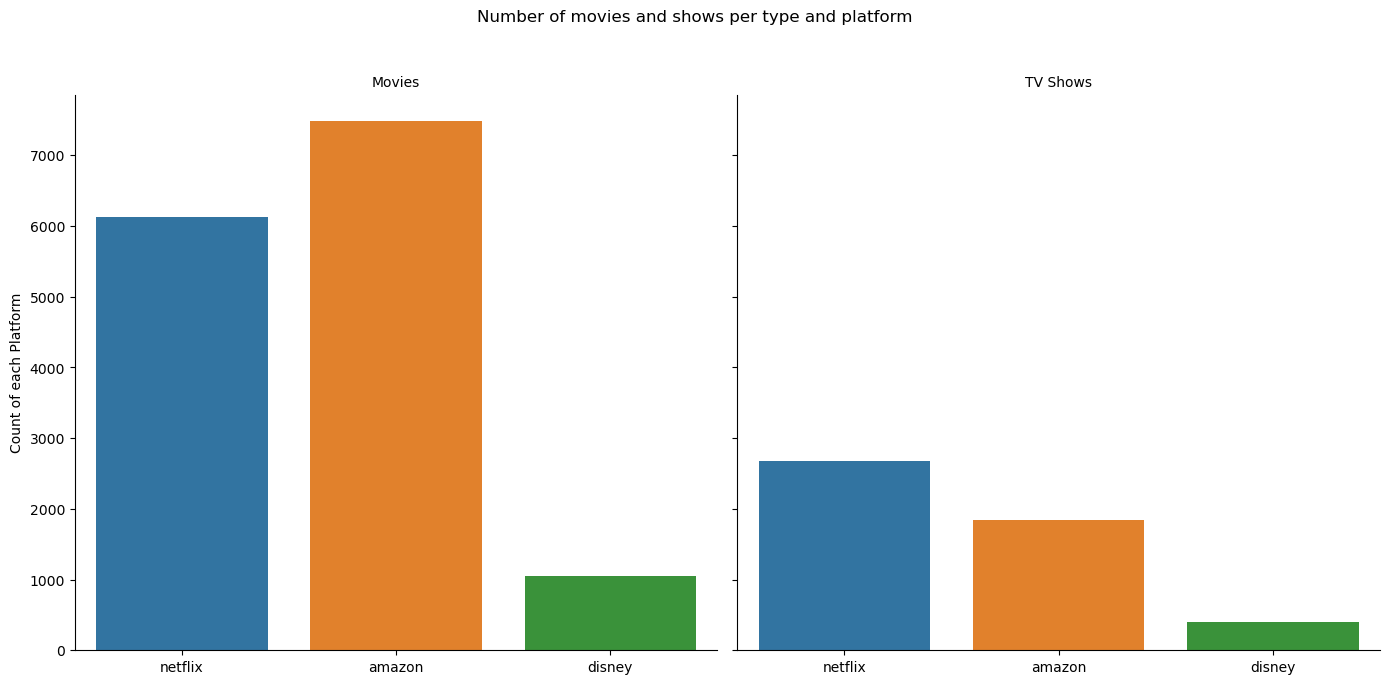

In [22]:
#Import libaries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

g=sns.catplot(x='platform',kind='count',data=df,col='type',height=7) 
g.set_xticklabels(rotation=90)
g.set(xlabel='',ylabel='Count of each Platform')

g.fig.suptitle('Number of movies and shows per type and platform',y=1.03)
g.set_titles('{col_name}s')

plt.tight_layout()
g.set_xticklabels(rotation = 0)
plt.show()

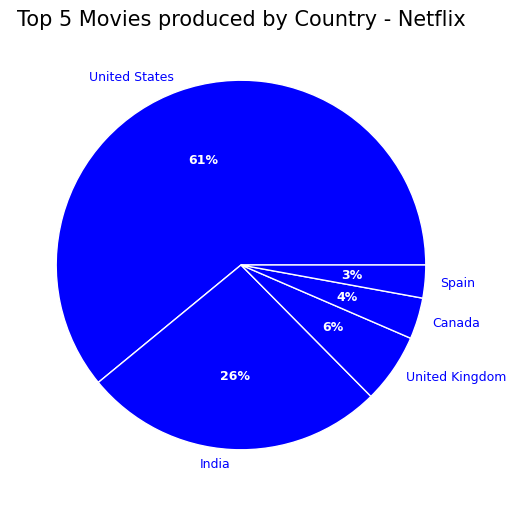

In [35]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import ConnectionPatch
import seaborn as sns

values = dataset["Count"]
labels = dataset["Country"]
color = ['blue']

plt.figure(figsize=(6,6))
_, texts, autotexts = plt.pie(values, labels=labels, 
        labeldistance=1.08, 
        wedgeprops = { 'linewidth' : 1, 'edgecolor' : 'white' }, colors=color
        ,autopct='%0.0f%%');
plt.setp(texts, **{'color':"blue", 'weight':'normal', 'fontsize':9})
plt.setp(autotexts, **{'color':'white', 'weight':'bold', 'fontsize':9})
plt.title("Top 5 Movies produced by Country - Netflix", size=15)

plt.show()

---